## <font color='red'>Linear Regression Single Variable</font>
### Sample problem of predicting home price in monroe, new jersey (USA) 
Below table represents current home prices in monroe township based on square feet area, new jersey<br>
<img src='homepricetable.JPG'><br>
**Problem Statement:** Given above data build a machine learning model that can predict home prices based on square feet area

You can represent values in above table as a scatter plot (values are shown in red markers). After that one can draw a straight line that best fits values on chart.
<img src='scatterplot.JPG'>
You can draw multiple lines like this but we choose the one where total sum of error is minimum
<img src='equation.PNG'>

You might remember about linear equation from your high school days math class. Home prices can be presented as following equation,

home price = m * (area) + b
Generic form of same equation is,
<img src='linear_equation.PNG'>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model  

In [3]:
df = pd.read_csv('homeprices.csv')
df

area   price
0  2600  550000
1  3000  565000
2  3200  610000
3  3600  680000
4  4000  725000

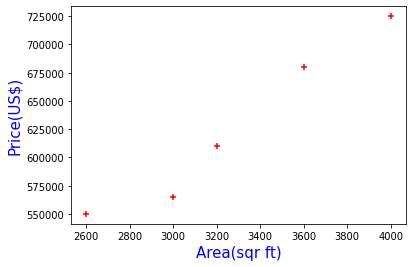

In [46]:
%matplotlib inline
plt.xlabel('Area(sqr ft)', fontsize=15, color='blue')
plt.ylabel('Price(US$)',fontsize=15, color='blue')
plt.scatter(df.area, df.price, color='red', marker='+')


***y = mx + c*** <br>
***price = m * area + b***                  

In [26]:
reg = linear_model.LinearRegression()
reg.fit(df[['area']], df.price)

LinearRegression()

In [42]:
reg.predict([[3300]])

array([628715.75342466])

In [43]:
reg.predict([[3500.56]])

array([655949.32876712])

In [50]:
reg.predict([[100]])

array([194195.20547945])

In [37]:
# Slop m
m = reg.coef_
m

array([135.78767123])

In [38]:
#Intercept b
b = reg.intercept_
b

180616.43835616432

In [39]:
price = m*3300+b
price

array([628715.75342466])

In [51]:
price2 = m*1500+b
price2

array([384297.94520548])

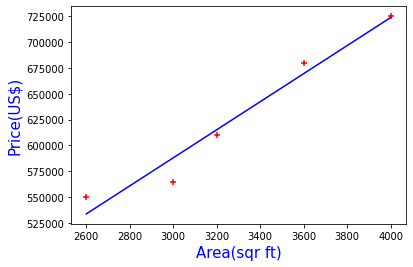

In [82]:
%matplotlib inline
plt.xlabel('Area(sqr ft)', fontsize=15, color='blue')
plt.ylabel('Price(US$)',fontsize=15, color='blue')
plt.scatter(df.area, df.price, color='red', marker='+')
plt.plot(df.area, reg.predict(df[['area']]), color='blue')

### Area dataframe

In [78]:
df2 = pd.read_csv('areas.csv')
df2.head(3)

area
0  1000
1  1500
2  2300

In [79]:
p = reg.predict(df2)
p

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [74]:
df2['price'] = reg.predict(df2)
df2

area         price
0   1000  3.164041e+05
1   1500  3.842979e+05
2   2300  4.929281e+05
3   3540  6.613048e+05
4   4120  7.400616e+05
5   4560  7.998082e+05
6   5490  9.260908e+05
7   3460  6.504418e+05
8   4750  8.256079e+05
9   2300  4.929281e+05
10  9000  1.402705e+06
11  8600  1.348390e+06
12  7100  1.144709e+06

In [76]:
df2.to_csv('prediction.csv', index=False)